# LSTM 

## Outline
1. [Imports](#imports)
2. [Data](#data)
3. [Model](#model)
5. [Train](#train)
6. [Predict](#predict)

<a name=imports></a>
## Imports

In [1]:
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

<a name=data></a>
## Data

### Ingestion 

In [2]:
# Get the path of the current working directory
curPath = os.getcwd()
# Appened the parent directory to the current path to step out of the current folder
parentDir = os.path.abspath(os.path.join(curPath, os.pardir))
print("Parent Directory", parentDir)
# Save the path to all of the datasets
india_cases_path = os.path.join(parentDir, "../cleaned_datasets/india/daily_cases_india.csv")
india_vacc_path = os.path.join(parentDir, "../cleaned_datasets/india/daily_vacc_india.csv")
usa_cases_path = os.path.join(parentDir, "../cleaned_datasets/usa/daily_cases_usa.csv")
usa_vacc_path = os.path.join(parentDir, "../cleaned_datasets/usa/vacc_usa.csv")

# Quick check to make sure the path exists
print("Path:", india_cases_path)
print("Exists:", os.path.exists(india_cases_path))

Parent Directory /covid19-prediction/models
Path: /covid19-prediction/models/../cleaned_datasets/india/daily_cases_india.csv
Exists: True


In [3]:
# Load the data as a pandas dataframe
india_cases_df = pd.read_csv(india_cases_path)
india_vacc_df =  pd.read_csv(india_vacc_path)

usa_cases_df = pd.read_csv(usa_cases_path)
usa_vacc_df = pd.read_csv(usa_vacc_path)

# Visualize the datasets
print('India Cases:\n',india_cases_df.head(),'\n')
print('India Vacc:\n',india_vacc_df.head(),'\n')

print('USA Cases:\n',usa_cases_df.head(),'\n')
print('USA Vacc:\n',usa_vacc_df.head(),'\n')

India Cases:
    Unnamed: 0        Date  Confirmed  Deaths  Recovered  Active
0           0  2020-01-30        1.0     0.0        0.0     0.0
1           1  2020-01-31        0.0     0.0        0.0     0.0
2           2  2020-02-01        0.0     0.0        0.0     0.0
3           3  2020-02-02        1.0     0.0        0.0     0.0
4           4  2020-02-03        1.0     0.0        0.0     0.0 

India Vacc:
    Updated On  Total_Doses  First_Dose  Second_Dose
0  2021-01-16          NaN         NaN          NaN
1  2021-01-17      20656.0     20656.0          0.0
2  2021-01-18      81690.0     81690.0          0.0
3  2021-01-19     192152.0    192152.0          0.0
4  2021-01-20     111510.0    111510.0          0.0 

USA Cases:
          Date  Confirmed  Deaths  Recovered
0  2020-04-12        NaN     NaN        NaN
1  2020-04-13    25322.0  1546.0    11785.0
2  2020-04-14    26713.0  2305.0     6484.0
3  2020-04-15    29380.0  2478.0     6093.0
4  2020-04-16    31542.0  4616.0     5234

### Pre-Processing

### Multivariate

In [4]:
india_cases_multi_df = india_cases_df[["Date","Confirmed","Deaths","Recovered","Active"]]

### Univariate 

In [5]:
# Select only the Confirmed column for univariate analysis
# Selecting from the first index because the 0th index is NaN
india_cases_df = india_cases_df[["Confirmed"]][1:]
usa_cases_df = usa_cases_df[["Confirmed"]][1:]

# Visualize the datasets
print('India Cases:\n',india_cases_df.head(),'\n')
print('USA Cases:\n',usa_cases_df.head(),'\n')

India Cases:
    Confirmed
1        0.0
2        0.0
3        1.0
4        1.0
5        0.0 

USA Cases:
    Confirmed
1    25322.0
2    26713.0
3    29380.0
4    31542.0
5    32022.0 



In [6]:
# Normalize the data
india_cases_mean = india_cases_df.mean()
india_cases_std = india_cases_df.std()

usa_cases_mean = usa_cases_df.mean()
usa_cases_std = usa_cases_df.std()


india_cases_df = (india_cases_df-india_cases_mean)/india_cases_std
usa_cases_df = (usa_cases_df-usa_cases_mean)/usa_cases_std

# Visualize the datasets
print('India Cases:\n',india_cases_df.head(),'\n')
print('USA Cases:\n',usa_cases_df.head(),'\n')

India Cases:
    Confirmed
1  -0.687995
2  -0.687995
3  -0.687983
4  -0.687983
5  -0.687995 

USA Cases:
    Confirmed
1  -0.817861
2  -0.797170
3  -0.757499
4  -0.725340
5  -0.718200 



In [7]:
# Create train test splits
india_cases_train, india_cases_test = train_test_split(india_cases_df, test_size=0.2, shuffle=False)
india_vacc_train, india_vacc_test = train_test_split(india_vacc_df, test_size=0.2, shuffle=False)

usa_cases_train, usa_cases_test = train_test_split(usa_cases_df, test_size=0.2, shuffle=False)
usa_vacc_train, usa_vacc_test = train_test_split(usa_vacc_df, test_size=0.2, shuffle=False)

# Visualize splits
print('India Cases:\n',india_cases_train,'\n')
print('USA Cases:\n',usa_cases_train,'\n')

India Cases:
      Confirmed
1    -0.687995
2    -0.687995
3    -0.687983
4    -0.687983
5    -0.687995
..         ...
492   0.750239
493   0.576535
494   0.398886
495   0.475509
496   0.486403

[496 rows x 1 columns] 

USA Cases:
      Confirmed
1    -0.817861
2    -0.797170
3    -0.757499
4    -0.725340
5    -0.718200
..         ...
434  -1.128237
435  -1.020678
436  -1.035523
437  -1.001267
438  -0.989828

[438 rows x 1 columns] 



In [8]:
# Convert to numpy array
india_cases_train, india_cases_test = india_cases_train.to_numpy().flatten(), india_cases_test.to_numpy()
usa_cases_train, usa_cases_test = usa_cases_train.to_numpy().flatten(), usa_cases_test.to_numpy()

# Visualize outputs
print('India Cases:\n',india_cases_train,'\n')
print('USA Cases:\n',usa_cases_train,'\n')

India Cases:
 [-6.87995117e-01 -6.87995117e-01 -6.87982552e-01 -6.87982552e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87969986e-01
 -6.87995117e-01 -6.87706113e-01 -6.87969986e-01 -6.87982552e-01
 -6.87957421e-01 -6.87932290e-01 -6.87944855e-01 -6.87831767e-01
 -6.87919725e-01 -6.87856898e-01 -6.87882028e-01 -6.87743809e-01
 -6.87856898e-01 -6.87919725e-01 -6.87706113e-01 -6.87819202e-01
 -6.87517632e-01 -6.87366848e-01 -6.86914494e-01 -6.87165802e-01
 -6.86700882e-01 -6.87530198e-01 -6.86474705e-01 -6.87115540e-01
 -6.85984655e-01 -6.86738578e-01 -6.87530198e-01 -6.85142775e-01
 -6.8616057

In [9]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [10]:
# choose a number of time steps
n_steps = 3
# split into samples
india_cases_train_X, india_cases_train_y = split_sequence(india_cases_train, n_steps)
india_cases_test_X, india_cases_test_y = split_sequence(india_cases_test, n_steps)


# summarize the data
for i in range(0,5):
    print(india_cases_train_X[i], india_cases_train_y[i])

[-0.68799512 -0.68799512 -0.68798255] -0.687982551549953
[-0.68799512 -0.68798255 -0.68798255] -0.6879951169346211
[-0.68798255 -0.68798255 -0.68799512] -0.6879951169346211
[-0.68798255 -0.68799512 -0.68799512] -0.6879951169346211
[-0.68799512 -0.68799512 -0.68799512] -0.6879951169346211


In [11]:
# Reshape the data into [samples, timesteps, features]
# univariate
n_features = 1

india_cases_train_X = india_cases_train_X.reshape((india_cases_train_X.shape[0], 
                                                   india_cases_train_X.shape[1], n_features))
india_cases_test_X = india_cases_test_X.reshape((india_cases_test_X.shape[0], 
                                                 india_cases_test_X.shape[1], n_features))

# Visualize outputs
print('India Cases:\n',india_cases_train_X,'\n')

India Cases:
 [[[-0.68799512]
  [-0.68799512]
  [-0.68798255]]

 [[-0.68799512]
  [-0.68798255]
  [-0.68798255]]

 [[-0.68798255]
  [-0.68798255]
  [-0.68799512]]

 ...

 [[ 0.82649813]
  [ 0.75023881]
  [ 0.57653493]]

 [[ 0.75023881]
  [ 0.57653493]
  [ 0.39888553]]

 [[ 0.57653493]
  [ 0.39888553]
  [ 0.47550924]]] 



<a name=model></a>
## Model 

### Univariate non-stacked

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanAbsolutePercentageError, MeanAbsoluteError
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [13]:
# Define the model
def build_univariate_non_stacked(optimizer="adam", lstm_nparams=100, n_steps=3, n_features=1):
    model_uni = Sequential()
    model_uni.add(LSTM(lstm_nparams, activation='relu', input_shape=(n_steps, n_features)))
    model_uni.add(Dense(1))
    model_uni.compile(optimizer=optimizer,loss='mae', metrics=["mae"])
    model_uni.summary()
    return model_uni

#### Grid Search

In [14]:
# Using KerasClassifier wrapper 
keras_estimator = KerasRegressor(build_fn=build_univariate_non_stacked, verbose=1)

In [ ]:
# Defining parameters for the gridserach
param_grid = {
#     'epochs': [10,100,300,],
    'lstm_nparams':[15,50],
#     'n_steps': [3, 6, 15],
#     'optimizer': ['RMSprop','Adam','Adamax','sgd']
}

kfold_splits = 5

In [ ]:
# Defining GridSearch
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=-1,
                    return_train_score=True,
                    cv=kfold_splits,
                    param_grid=param_grid,
#                     scoring="neg_mean_absolute_error",
)

In [ ]:
# Fitting GridSearch
grid_result = grid.fit(india_cases_train_X, india_cases_train_y, )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Writing the gridsearch results to file
file1 = open("univariate_non_stacked_india.txt", "w")
file1.write("mean,stdev,pram")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    file1.write("%f,%f,%r" % (mean, stdev, param))
    file1.write("\n")
file1.close()

In [ ]:
sorted(grid_result.cv_results_.keys())

In [ ]:
grid_result.cv_results_['split2_train_score']

### Univariate stacked 

In [15]:
# Define the model
def build_univariate_stacked(optimizer="adam",lstm_nparams_l1=100, lstm_nparams_l2=150, n_steps=3, n_features=1):
    model_uni_stacked = Sequential()
    model_uni_stacked.add(LSTM(lstm_nparams_l1, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model_uni_stacked.add(LSTM(lstm_nparams_l2, activation='relu'))
    model_uni_stacked.add(Dense(1))
    model_uni_stacked.compile(optimizer=optimizer,loss='mae')
    model_uni_stacked.summary()
    return model_uni_stacked

#### Grid Search

In [ ]:
# Using KerasClassifier wrapper 
keras_estimator = KerasRegressor(build_fn=build_univariate_stacked, verbose=1)

In [ ]:
# Defining parameters for the gridserach
param_grid = {
    'epochs': [10,100,300,],
    'lstm_nparams_l1':[15,50,100,150],
    'lstm_nparams_l2':[15,50,100,150],
    'n_steps': [3, 6, 15],
#     'optimizer': ['RMSprop','Adam','Adamax','sgd']
}

kfold_splits = 5

In [ ]:
# Defining GridSearch
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=-1,
                    return_train_score=True,
                    cv=kfold_splits,
                    param_grid=param_grid,
                    scoring="neg_mean_absolute_error",
)

In [ ]:
# Fitting GridSearch
grid_result = grid.fit(india_cases_train_X, india_cases_train_y, )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Writing the gridsearch results to file
file1 = open("univariate_stacked_india.txt", "w")
file1.write("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
file1.write("\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    file1.write("%f (%f) with: %r" % (mean, stdev, param))
    file1.write("\n")
file1.close()

## Multivariate 

In [17]:
# Define the model
model_uni = Sequential()
model_uni.add(LSTM(150, activation='relu', input_shape=(n_steps, n_features)))
model_uni.add(Dense(1))
model_uni.compile(optimizer='adam',loss='mae')
model_uni.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


<a name=train></a>
## Train 

In [18]:
# Tensorboard callback
logdir = os.path.join(parentDir+"/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

### Univariate non-stacked

In [19]:
# Fit the model
model_uni = build_univariate_non_stacked()
model_uni.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni.save('univar_1_50.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 2s 29ms/step - loss: 0.6528 - mae: 0.6528 - val_loss: 0.1765 - val_mae: 0.1765
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 0.5165 - mae: 0.5165 - val_loss: 0.1186 - val_mae: 0.1186
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 0.3137 - mae: 0.3137 - val_loss: 0.0797 - val_mae: 0.0797
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 0.1403 - mae: 0.1403 - val_loss: 0.0801 - val

16/16 [==============================] - 0s 6ms/step - loss: 0.0771 - mae: 0.0771 - val_loss: 0.0703 - val_mae: 0.0703
Epoch 58/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688 - val_loss: 0.0646 - val_mae: 0.0646
Epoch 59/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0684 - mae: 0.0684 - val_loss: 0.0655 - val_mae: 0.0655
Epoch 60/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0699 - mae: 0.0699 - val_loss: 0.0677 - val_mae: 0.0677
Epoch 61/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0684 - mae: 0.0684 - val_loss: 0.0670 - val_mae: 0.0670
Epoch 62/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0674 - mae: 0.0674 - val_loss: 0.0667 - val_mae: 0.0667
Epoch 63/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0684 - mae: 0.0684 - val_loss: 0.0671 - val_mae: 0.0671
Epoch 64/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0722 - mae: 0

16/16 [==============================] - 0s 6ms/step - loss: 0.0682 - mae: 0.0682 - val_loss: 0.0635 - val_mae: 0.0635
Epoch 120/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0701 - mae: 0.0701 - val_loss: 0.0720 - val_mae: 0.0720
Epoch 121/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0659 - mae: 0.0659 - val_loss: 0.0671 - val_mae: 0.0671
Epoch 122/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0659 - mae: 0.0659 - val_loss: 0.0672 - val_mae: 0.0672
Epoch 123/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0700 - mae: 0.0700 - val_loss: 0.0653 - val_mae: 0.0653
Epoch 124/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0687 - mae: 0.0687 - val_loss: 0.0649 - val_mae: 0.0649
Epoch 125/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0668 - mae: 0.0668 - val_loss: 0.0713 - val_mae: 0.0713
Epoch 126/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0657 -

Epoch 181/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0629 - mae: 0.0629 - val_loss: 0.0632 - val_mae: 0.0632
Epoch 182/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0659 - mae: 0.0659 - val_loss: 0.0642 - val_mae: 0.0642
Epoch 183/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0647 - mae: 0.0647 - val_loss: 0.0683 - val_mae: 0.0683
Epoch 184/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0681 - mae: 0.0681 - val_loss: 0.0614 - val_mae: 0.0614
Epoch 185/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0647 - mae: 0.0647 - val_loss: 0.0661 - val_mae: 0.0661
Epoch 186/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0632 - mae: 0.0632 - val_loss: 0.0668 - val_mae: 0.0668
Epoch 187/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0628 - mae: 0.0628 - val_loss: 0.0654 - val_mae: 0.0654
Epoch 188/300
16/16 [==============================] - 0s 6ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0615 - mae: 0.0615 - val_loss: 0.0619 - val_mae: 0.0619
Epoch 243/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0616 - mae: 0.0616 - val_loss: 0.0590 - val_mae: 0.0590
Epoch 244/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0592 - mae: 0.0592 - val_loss: 0.0631 - val_mae: 0.0631
Epoch 245/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0601 - mae: 0.0601 - val_loss: 0.0600 - val_mae: 0.0600
Epoch 246/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0607 - mae: 0.0607 - val_loss: 0.0646 - val_mae: 0.0646
Epoch 247/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0608 - mae: 0.0608 - val_loss: 0.0587 - val_mae: 0.0587
Epoch 248/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0629 - mae: 0.0629 - val_loss: 0.0622 - val_mae: 0.0622
Epoch 249/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0598 -

### Univariate stacked 

In [20]:
# Fit the model
model_uni_stacked.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked.save('univar_2_50.h5')

NameError: name 'model_uni_stacked' is not defined

<a name=predict></a>
## Predict

In [21]:
india_cases_test_X

array([[[ 0.4716768 ],
        [ 0.3716689 ],
        [ 0.32771519]],

       [[ 0.3716689 ],
        [ 0.32771519],
        [ 0.19687184]],

       [[ 0.32771519],
        [ 0.19687184],
        [ 0.07184626]],

       [[ 0.19687184],
        [ 0.07184626],
        [ 0.09387338]],

       [[ 0.07184626],
        [ 0.09387338],
        [ 0.15649926]],

       [[ 0.09387338],
        [ 0.15649926],
        [ 0.09709012]],

       [[ 0.15649926],
        [ 0.09709012],
        [ 0.0753897 ]],

       [[ 0.09709012],
        [ 0.0753897 ],
        [ 0.04363697]],

       [[ 0.0753897 ],
        [ 0.04363697],
        [-0.01638787]],

       [[ 0.04363697],
        [-0.01638787],
        [-0.15220711]],

       [[-0.01638787],
        [-0.15220711],
        [-0.04907044]],

       [[-0.15220711],
        [-0.04907044],
        [-0.00859733]],

       [[-0.04907044],
        [-0.00859733],
        [-0.03877939]],

       [[-0.00859733],
        [-0.03877939],
        [-0.07608601]],

      

### Univariate 

In [22]:
x_input = np.array(india_cases_test_X)
print(x_input)
yhat = model_uni.predict(x_input)
print(yhat)

[[[ 0.4716768 ]
  [ 0.3716689 ]
  [ 0.32771519]]

 [[ 0.3716689 ]
  [ 0.32771519]
  [ 0.19687184]]

 [[ 0.32771519]
  [ 0.19687184]
  [ 0.07184626]]

 [[ 0.19687184]
  [ 0.07184626]
  [ 0.09387338]]

 [[ 0.07184626]
  [ 0.09387338]
  [ 0.15649926]]

 [[ 0.09387338]
  [ 0.15649926]
  [ 0.09709012]]

 [[ 0.15649926]
  [ 0.09709012]
  [ 0.0753897 ]]

 [[ 0.09709012]
  [ 0.0753897 ]
  [ 0.04363697]]

 [[ 0.0753897 ]
  [ 0.04363697]
  [-0.01638787]]

 [[ 0.04363697]
  [-0.01638787]
  [-0.15220711]]

 [[-0.01638787]
  [-0.15220711]
  [-0.04907044]]

 [[-0.15220711]
  [-0.04907044]
  [-0.00859733]]

 [[-0.04907044]
  [-0.00859733]
  [-0.03877939]]

 [[-0.00859733]
  [-0.03877939]
  [-0.07608601]]

 [[-0.03877939]
  [-0.07608601]
  [-0.05922327]]

 [[-0.07608601]
  [-0.05922327]
  [-0.10812775]]

 [[-0.05922327]
  [-0.10812775]
  [-0.21596388]]

 [[-0.10812775]
  [-0.21596388]
  [-0.11060313]]

 [[-0.21596388]
  [-0.11060313]
  [-0.07498026]]

 [[-0.11060313]
  [-0.07498026]
  [-0.10223458]]



In [50]:
# Reversing Z-score normalization

# india_cases_df = (india_cases_df-india_cases_mean)/india_cases_std
# usa_cases_df = (usa_cases_df-usa_cases_mean)/usa_cases_std

print('std',type(india_cases_std))
print('mean',type(india_cases_mean))
casted_mean = india_cases_mean.to_numpy()
casted_std = india_cases_std.to_numpy()
print('std',type(casted_std))
print('std',casted_std)


print('x',type(x_input))

x_input_scaled = (x_input*india_cases_std[0])+india_cases_mean[0]
yhat_scaled = (india_cases_std[0]*yhat)+india_cases_mean[0]

std <class 'pandas.core.series.Series'>
mean <class 'pandas.core.series.Series'>
std <class 'numpy.ndarray'>
std [79583.71561331]
x <class 'numpy.ndarray'>


#### Plot

In [57]:
def plot_fore_test(test, fore, title):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)

    ax.plot(test, color='blue', label='Test')
    ax.plot(fore, color='red', label='Forecast')
    ax.legend(loc='best')
    plt.title(title)
    plt.show()

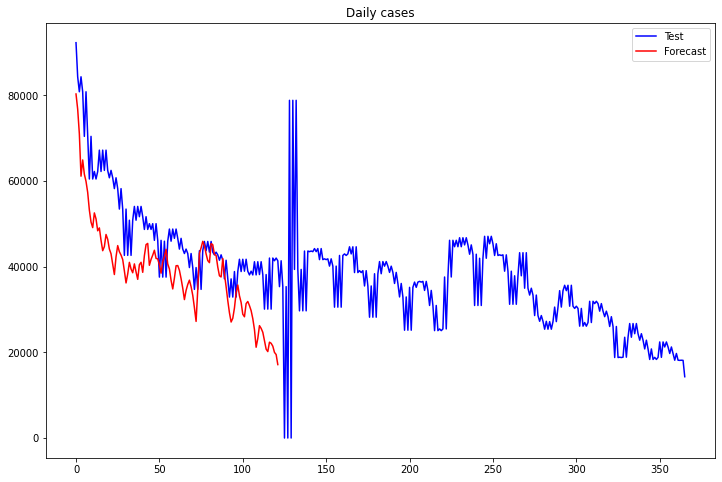

In [58]:
plot_fore_test(x_input_scaled.flatten(), yhat_scaled, title='Daily cases')

### Univariate stacked 

### Univariate 

In [54]:
x_input = np.array(india_cases_test_X)
print(x_input)
yhat_stacked = model_uni_stacked.predict(x_input)
print(yhat)

[[[ 0.4716768 ]
  [ 0.3716689 ]
  [ 0.32771519]]

 [[ 0.3716689 ]
  [ 0.32771519]
  [ 0.19687184]]

 [[ 0.32771519]
  [ 0.19687184]
  [ 0.07184626]]

 [[ 0.19687184]
  [ 0.07184626]
  [ 0.09387338]]

 [[ 0.07184626]
  [ 0.09387338]
  [ 0.15649926]]

 [[ 0.09387338]
  [ 0.15649926]
  [ 0.09709012]]

 [[ 0.15649926]
  [ 0.09709012]
  [ 0.0753897 ]]

 [[ 0.09709012]
  [ 0.0753897 ]
  [ 0.04363697]]

 [[ 0.0753897 ]
  [ 0.04363697]
  [-0.01638787]]

 [[ 0.04363697]
  [-0.01638787]
  [-0.15220711]]

 [[-0.01638787]
  [-0.15220711]
  [-0.04907044]]

 [[-0.15220711]
  [-0.04907044]
  [-0.00859733]]

 [[-0.04907044]
  [-0.00859733]
  [-0.03877939]]

 [[-0.00859733]
  [-0.03877939]
  [-0.07608601]]

 [[-0.03877939]
  [-0.07608601]
  [-0.05922327]]

 [[-0.07608601]
  [-0.05922327]
  [-0.10812775]]

 [[-0.05922327]
  [-0.10812775]
  [-0.21596388]]

 [[-0.10812775]
  [-0.21596388]
  [-0.11060313]]

 [[-0.21596388]
  [-0.11060313]
  [-0.07498026]]

 [[-0.11060313]
  [-0.07498026]
  [-0.10223458]]



NameError: name 'model_uni_stacked' is not defined

## Evaluate

### Univariate 

In [55]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat).numpy()

35.146946

In [56]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat).numpy()

0.05580243

### Univariate stacked 

In [ ]:
mape(india_cases_test_y, yhat_stacked).numpy()